<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/chunk_prediction_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


import tensorflow
from tensorflow import keras
from tensorflow.keras import Layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

In [72]:
df=pd.read_csv("Churn_Modelling.csv")

In [73]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.shape

(10000, 14)

In [75]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [76]:
df.shape

(10000, 11)

In [77]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [79]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [80]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True, dtype=int)


In [81]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [82]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [85]:
st=StandardScaler()
X_train_tf=st.fit_transform(X_train)
X_test_tf=st.transform(X_test)

In [86]:
X_train_tf.shape

(8000, 11)

In [88]:
X_train_tf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [89]:
model=Sequential()

In [90]:
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
history=model.fit(X_train_tf,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4843 - loss: 0.7349 - val_accuracy: 0.7975 - val_loss: 0.5111
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8020 - loss: 0.4816 - val_accuracy: 0.7969 - val_loss: 0.4558
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7977 - loss: 0.4521 - val_accuracy: 0.8006 - val_loss: 0.4408
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7985 - loss: 0.4318 - val_accuracy: 0.8081 - val_loss: 0.4351
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8115 - loss: 0.4192 - val_accuracy: 0.8062 - val_loss: 0.4305
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8152 - loss: 0.4236 - val_accuracy: 0.8112 - val_loss: 0.4267
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8098 - loss: 0.4232 - val_accuracy: 0.8200 - val_loss: 0.4226
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8213 - loss: 0.4209 - val_accuracy: 0.

In [99]:
model.layers[2].get_weights()

[array([[ 0.09220114],
        [ 0.5595986 ],
        [ 0.28316575],
        [-0.2811296 ],
        [-0.8151646 ],
        [-0.25867724],
        [ 0.2361406 ],
        [ 0.7512316 ],
        [ 0.6022125 ],
        [ 0.37344545],
        [-0.5302198 ]], dtype=float32),
 array([-0.1454331], dtype=float32)]

In [101]:
y_pred_log=model.predict(X_test_tf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [102]:
y_pred=np.where(y_pred_log>0.5,1,0)

In [103]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8505

In [106]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

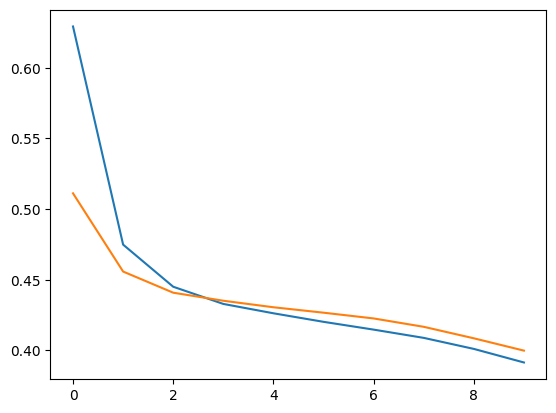

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])